# Networks

Networks are another important data structure in transportaiton.  Think roadway networks in particular, but many things can be represented as a network.  We'll go over a few basics in class. 

MPOs or DOTs with a travel model will maintain a network representation of the street network for use in the model.  This will have the attributes the model needs: free flow speed, capacity, length, directionality, turn restrictions, facility type, etc.  Usually, the best way to get a copy is to call up your friendly local transportation modler and ask.  Even in this tech-crazy world, it is amazing how far asking politely will get you...

...however, that's not what we're going to do here.  Instead, we are going to work with network data from OpenStreetMap: 

http://www.openstreetmap.org/

To make it easier, we will work with a package called OSMnx, by Geoff Boeing. You can read a paper on the toolkit here: 

https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

And a blog post here: 

http://geoffboeing.com/2016/11/osmnx-python-street-networks/


### Homework

Your homework is to: 

1. Read the network paper linked above. 

2. Use the blog post to figure out how to install and use the package. 

3. Get the street network for Lexington.  

4. Print the basic_stats for the network. 

5. Calculate and show the shortest path from your home (or another point of interest) to UK campus.  Is this the route you would take?  What is the same or different?

6. Repeat step 5 for three other trips that you make regularly.  

 

In [12]:
%matplotlib inline
import requests  
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp
import pandas as pd
import osmnx as ox
import networkx as nx

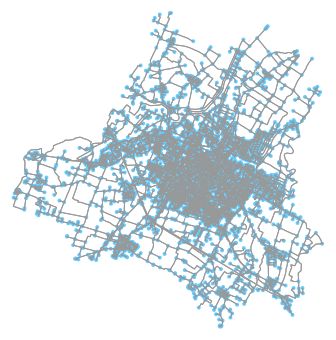

(<Figure size 599.212x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xea41c4fef0>)

In [13]:
import osmnx as ox
ox.plot_graph(ox.graph_from_place('Modena, Italy'))

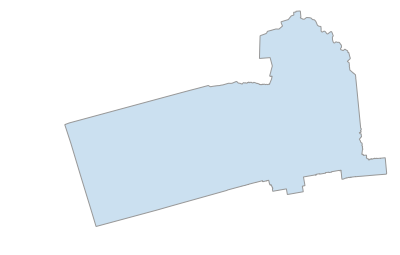

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xea4edde390>)

In [14]:
import osmnx as ox
city = ox.gdf_from_place('Berkeley, California')
ox.plot_shape(ox.project_gdf(city))

In [15]:
place1 = ox.gdf_from_place('Manhattan, New York City, New York, USA')
place2 = ox.gdf_from_place('Cook County, Illinois')
place3 = ox.gdf_from_place('Iowa, USA')
place4 = ox.gdf_from_place('Bolivia')

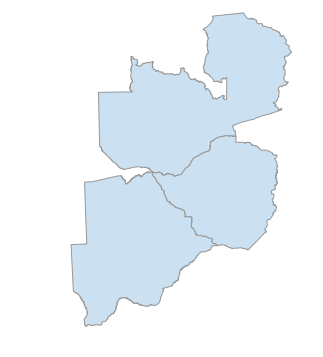

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xea3f836be0>)

In [16]:
places = ox.gdf_from_places(['Botswana', 'Zambia', 'Zimbabwe'])
places = ox.project_gdf(places)
ox.save_gdf_shapefile(places)
ox.plot_shape(ox.project_gdf(places))

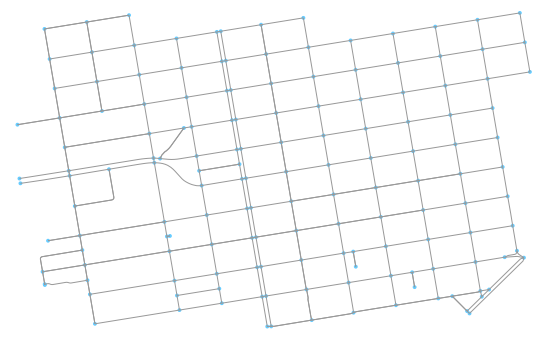

(<Figure size 687.674x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xea43664f28>)

In [17]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

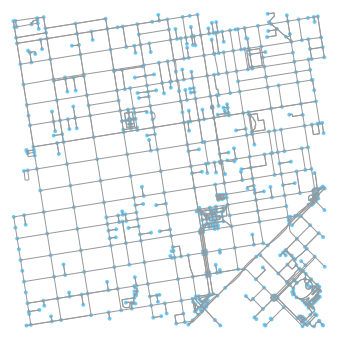

(<Figure size 542.615x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xea45dde978>)

In [18]:
G = ox.graph_from_point((37.79, -122.41), distance=750, network_type='all')
ox.plot_graph(G)

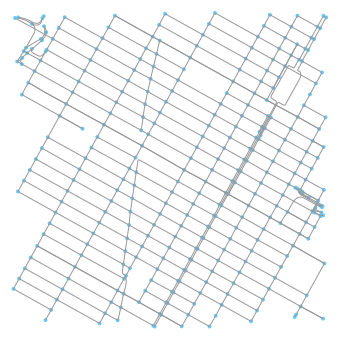

(<Figure size 568.567x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xea4a277390>)

In [19]:
G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
ox.plot_graph(G)

In [20]:
fayette_county = ox.core.graph_from_place('Fayette County, Kentucky', network_type='drive')

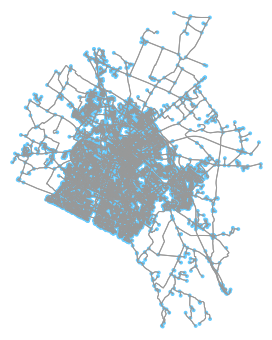

(<Figure size 434.802x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xea4456a320>)

In [21]:
ox.plot_graph(fayette_county)

In [22]:
ox.basic_stats(fayette_county)

{'n': 10760,
 'm': 26252,
 'k_avg': 4.879553903345725,
 'intersection_count': 8073,
 'streets_per_node_avg': 2.6818773234200743,
 'streets_per_node_counts': {0: 0,
  1: 2687,
  2: 40,
  3: 6088,
  4: 1900,
  5: 44,
  6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24972118959107806,
  2: 0.0037174721189591076,
  3: 0.5657992565055762,
  4: 0.17657992565055763,
  5: 0.004089219330855019,
  6: 9.29368029739777e-05},
 'edge_length_total': 4656673.612999996,
 'edge_length_avg': 177.38357507999376,
 'street_length_total': 2629233.079000013,
 'street_length_avg': 180.87734445514673,
 'street_segments_count': 14536,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0822394181026989,
 'self_loop_proportion': 0.011008685052567423,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

My house to campus

In [23]:
origin = ox.get_nearest_node(fayette_county,(37.989596,-84.553434))
dest = ox.get_nearest_node(fayette_county,(38.039602,-84.506833))
route = nx.shortest_path(fayette_county, origin, dest)

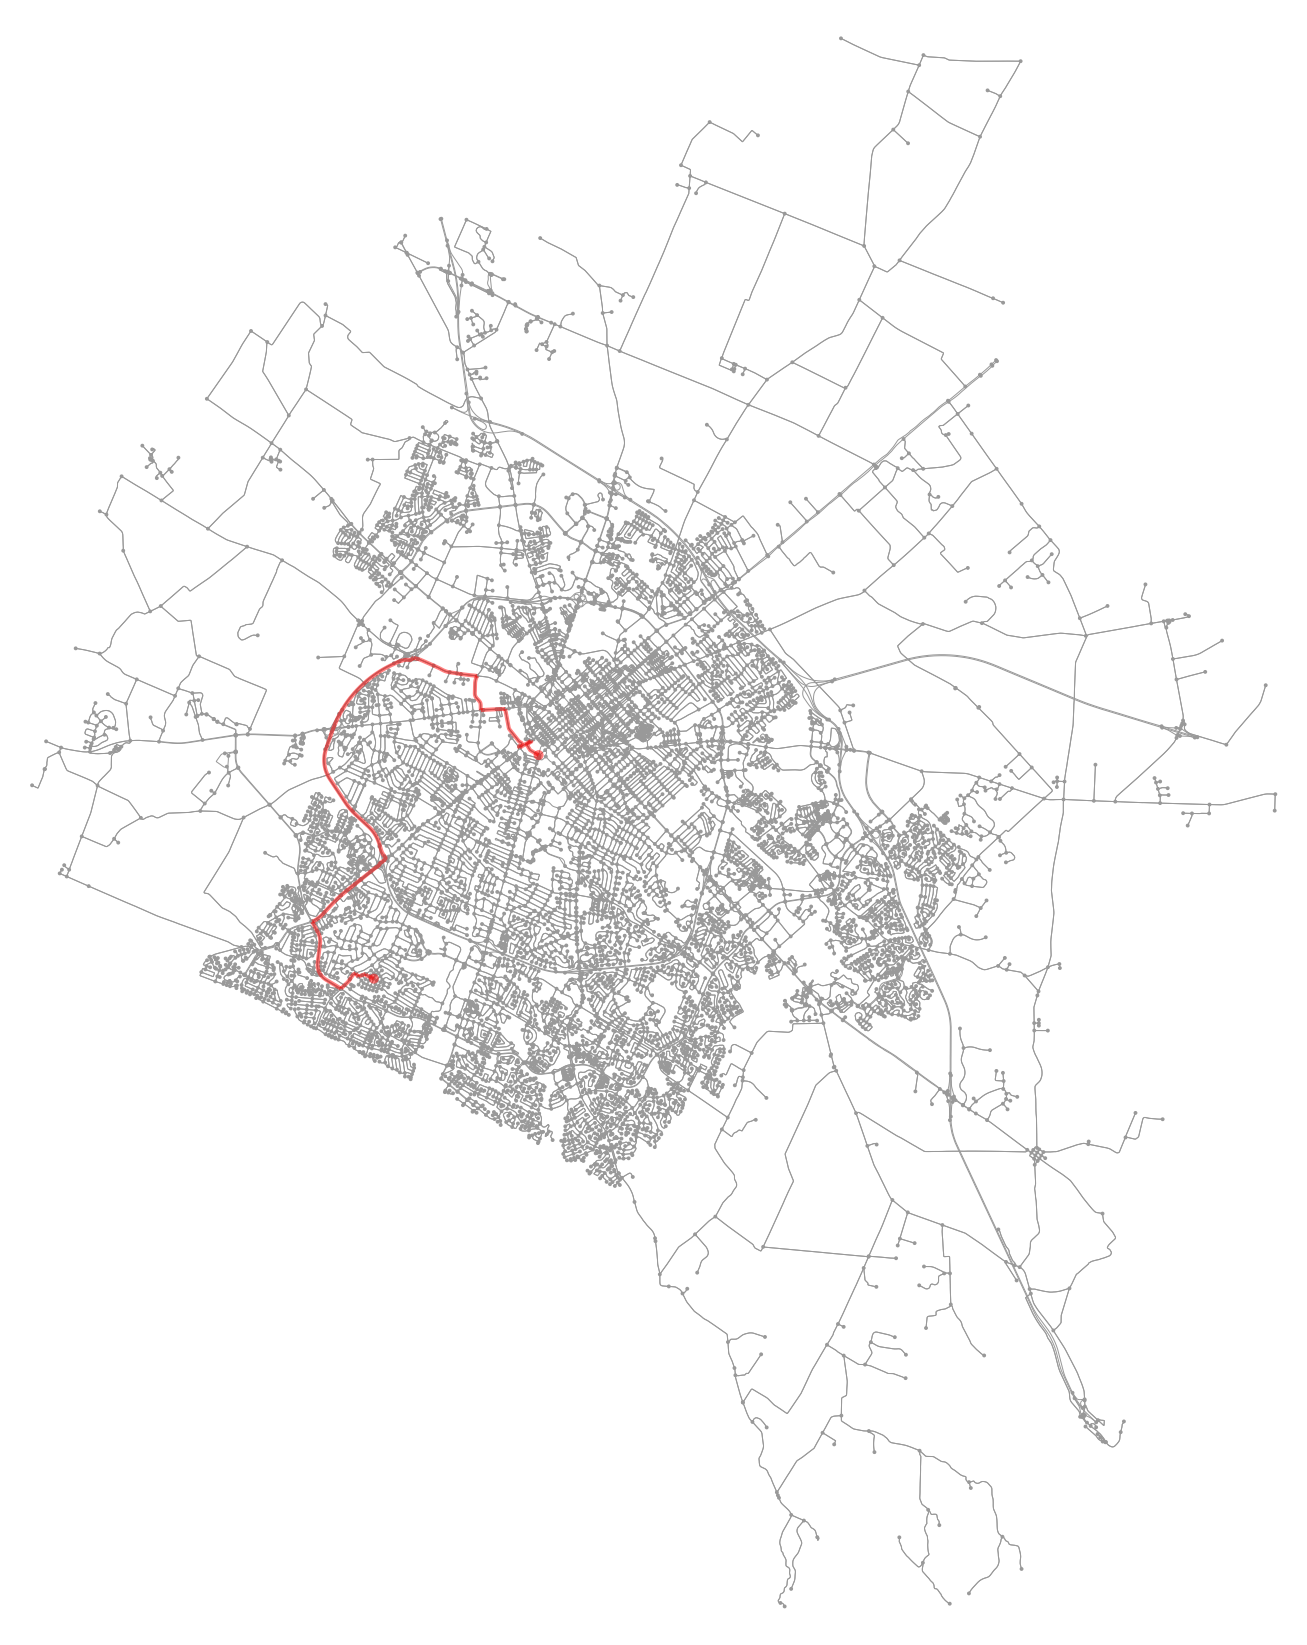

(<Figure size 2160x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xea40b7bf28>)

In [24]:
ox.plot_graph_route(fayette_county, route, fig_height=30,fig_width=30)

My house to Walmart on Nicholasville Road

In [25]:
origin = ox.get_nearest_node(fayette_county,(37.989596,-84.553434))
dest = ox.get_nearest_node(fayette_county,(38.000560,-84.520860))
route = nx.shortest_path(fayette_county, origin, dest)

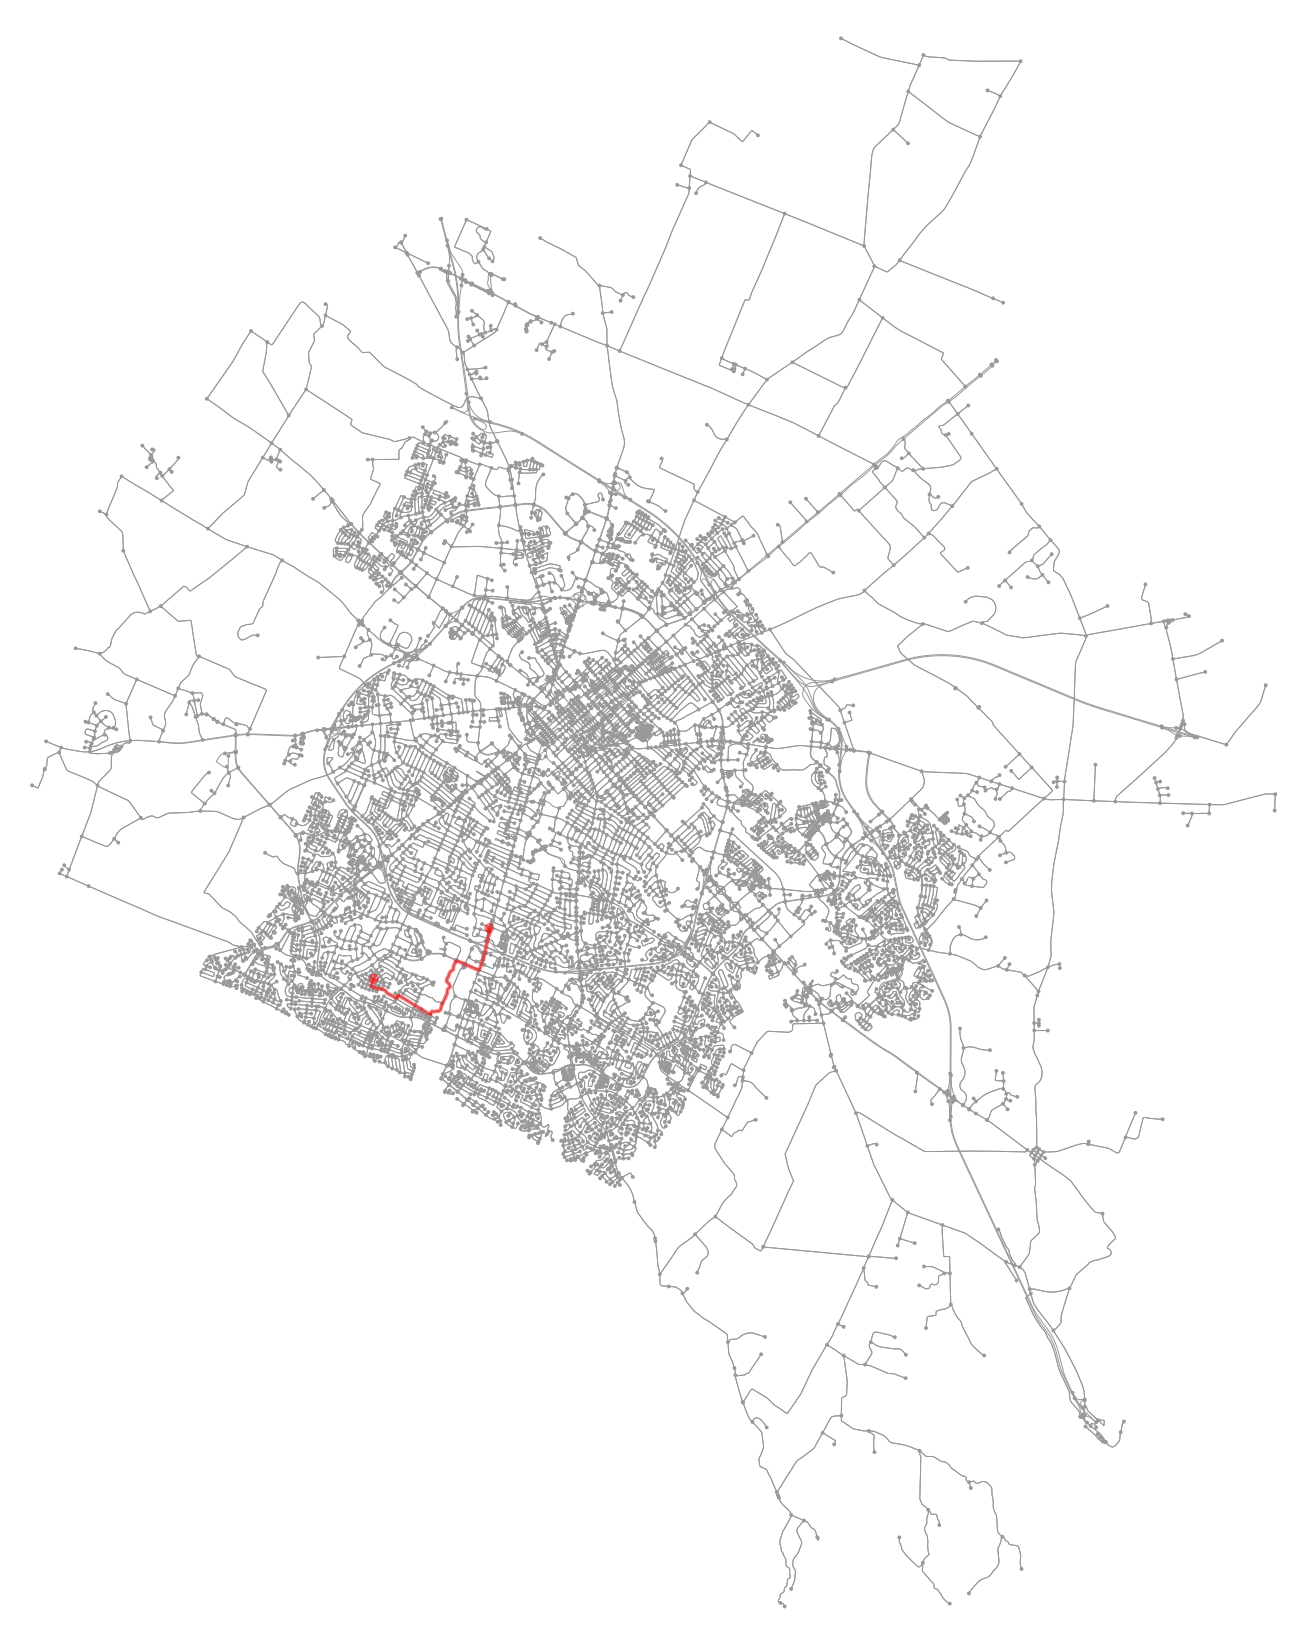

(<Figure size 2160x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xea3f844908>)

In [26]:
ox.plot_graph_route(fayette_county, route, fig_height=30,fig_width=30)

My house to Beaumont YMCA

In [27]:
origin = ox.get_nearest_node(fayette_county,(37.989596,-84.553434))
dest = ox.get_nearest_node(fayette_county,(38.016190,-84.562590))
route = nx.shortest_path(fayette_county, origin, dest)

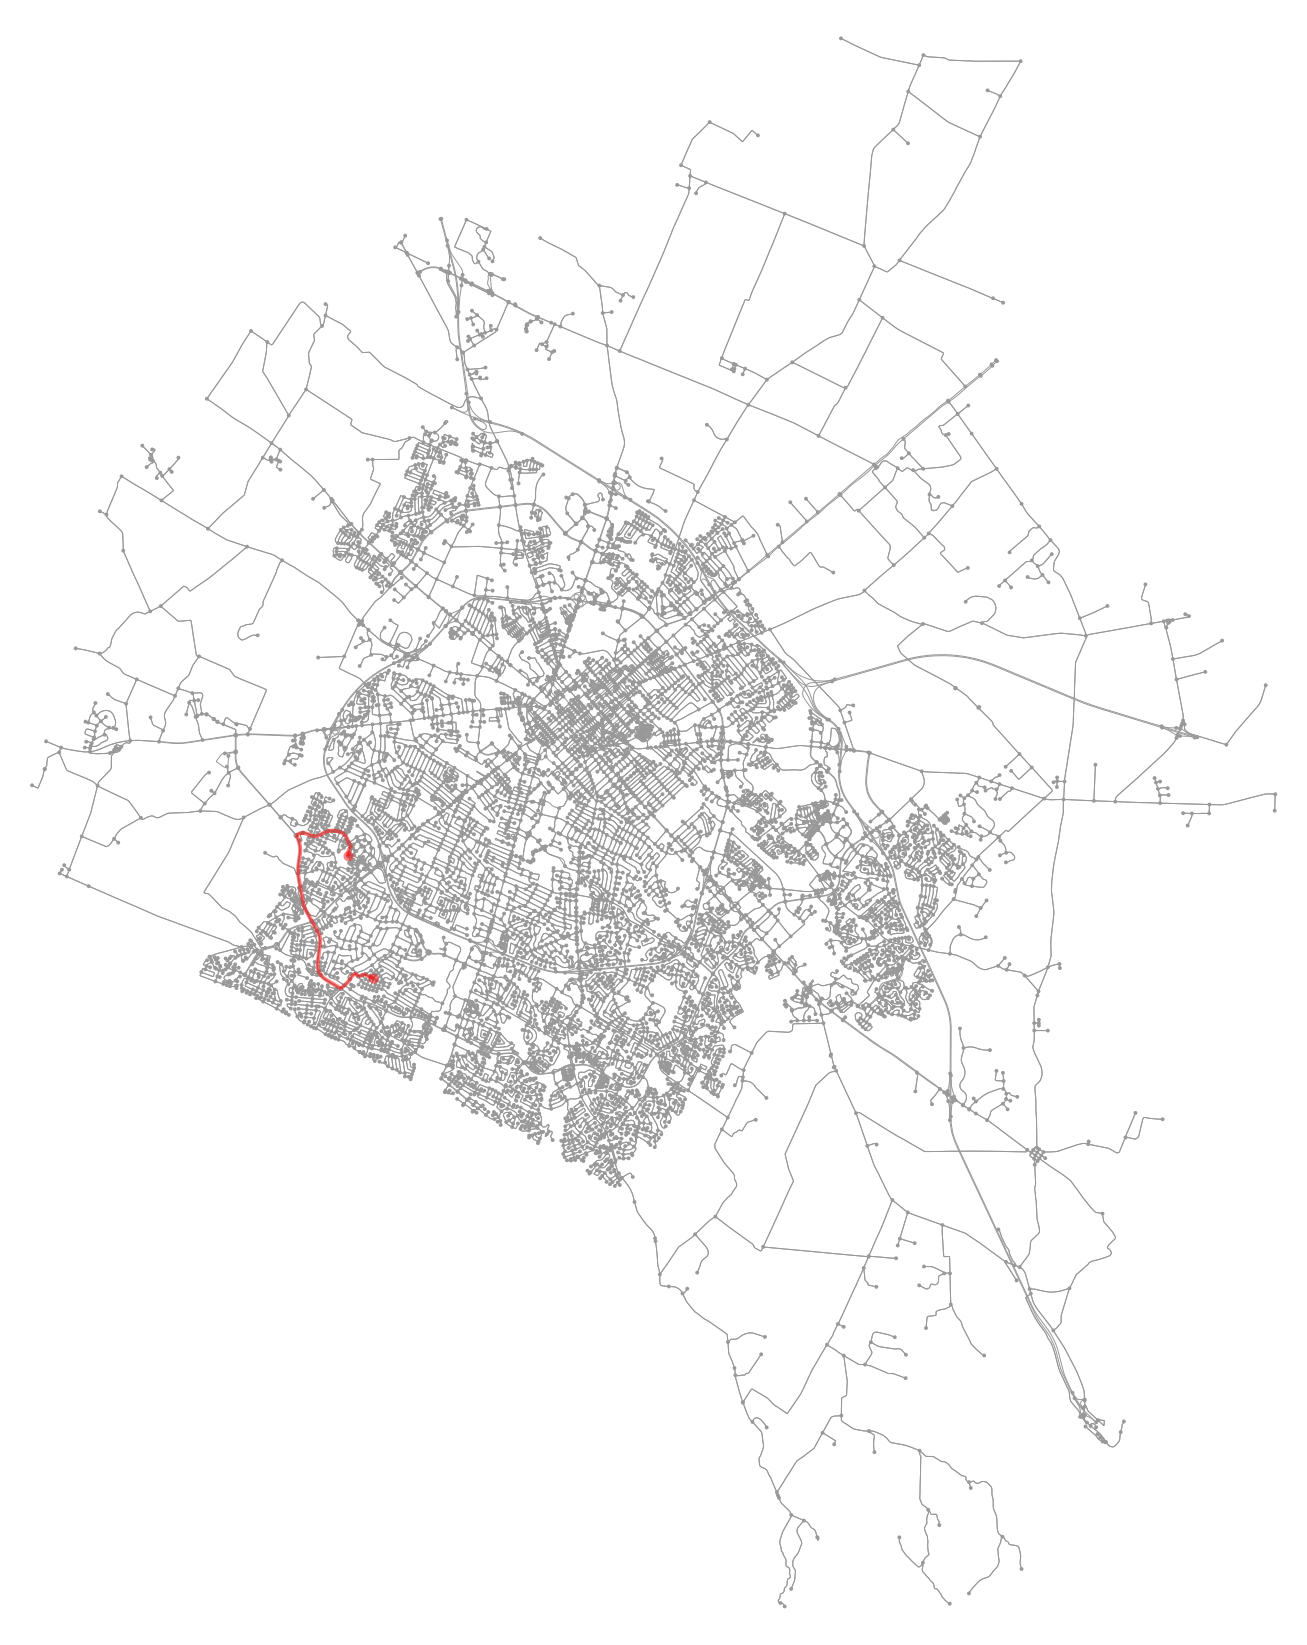

(<Figure size 2160x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xea41df05c0>)

In [28]:
ox.plot_graph_route(fayette_county, route, fig_height=30,fig_width=30)